In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
wnba = pd.read_csv("wnba.csv")

In [3]:
wnba.head()

,Name,Team,Pos,Height,Weight,BMI,Birth_Place,Birthdate,Age,College,...,OREB,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3
0,Aerial Powers,DAL,F,183,71.0,21.200991,US,"January 17, 1994",23,Michigan State,...,6,22,28,12,3,6,12,93,0,0
1,Alana Beard,LA,G/F,185,73.0,21.329438,US,"May 14, 1982",35,Duke,...,19,82,101,72,63,13,40,217,0,0
2,Alex Bentley,CON,G,170,69.0,23.875433,US,"October 27, 1990",26,Penn State,...,4,36,40,78,22,3,24,218,0,0
3,Alex Montgomery,SAN,G/F,185,84.0,24.543462,US,"December 11, 1988",28,Georgia Tech,...,35,134,169,65,20,10,38,188,2,0
4,Alexis Jones,MIN,G,175,78.0,25.469388,US,"August 5, 1994",23,Baylor,...,3,9,12,12,7,0,14,50,0,0


In [4]:
wnba.columns

Index(['Name', 'Team', 'Pos', 'Height', 'Weight', 'BMI', 'Birth_Place',
       'Birthdate', 'Age', 'College', 'Experience', 'Games Played', 'MIN',
       'FGM', 'FGA', 'FG%', '15:00', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'OREB',
       'DREB', 'REB', 'AST', 'STL', 'BLK', 'TO', 'PTS', 'DD2', 'TD3'],
      dtype='object')

In [5]:
wnba['Experience']

0       2
1      12
2       4
3       6
4       R
       ..
138     6
139     9
140     2
141     8
142     2
Name: Experience, Length: 143, dtype: object

In [6]:
wnba['Experience'].value_counts().sort_index()

1     12
10     5
11     4
12     4
13     3
14     3
15     2
2     11
3     19
4     11
5     14
6     14
7      4
8      3
9     11
R     23
Name: Experience, dtype: int64

In [7]:
wnba['Experience'] = wnba['Experience'].str.replace("R", "0").astype(int)

In [8]:
wnba['Experience'].value_counts().sort_index()

0     23
1     12
2     11
3     19
4     11
5     14
6     14
7      4
8      3
9     11
10     5
11     4
12     4
13     3
14     3
15     2
Name: Experience, dtype: int64

Different, direction, Size 


Nominal, Ordinal, Interval/ratio
                   continuous/discrete

In [9]:
def exp_ord(exp):
    if exp == 0:
        return "Rookie"
    elif exp in range(1,4):
        return "Little Experience"
    elif exp in [4,5]:
        return "Experienced"
    elif exp in range(6,11):
        return "Very Experienced"
    else:
        return "Veteran"
        

In [10]:
wnba['Experience'].shape

(143,)

In [11]:
wnba['Experience']

0       2
1      12
2       4
3       6
4       0
       ..
138     6
139     9
140     2
141     8
142     2
Name: Experience, Length: 143, dtype: int32

In [12]:
wnba['Experience'].apply(exp_ord)

0      Little Experience
1                Veteran
2            Experienced
3       Very Experienced
4                 Rookie
             ...        
138     Very Experienced
139     Very Experienced
140    Little Experience
141     Very Experienced
142    Little Experience
Name: Experience, Length: 143, dtype: object

In [13]:
wnba["Exp_ordinal"] = wnba['Experience'].apply(exp_ord)

In [14]:
wnba["Exp_ordinal"].value_counts()

Little Experience    42
Very Experienced     37
Experienced          25
Rookie               23
Veteran              16
Name: Exp_ordinal, dtype: int64

In [15]:
wnba["Exp_ordinal"].value_counts().iloc[[-2,0,2,1,-1]]

Rookie               23
Little Experience    42
Experienced          25
Very Experienced     37
Veteran              16
Name: Exp_ordinal, dtype: int64

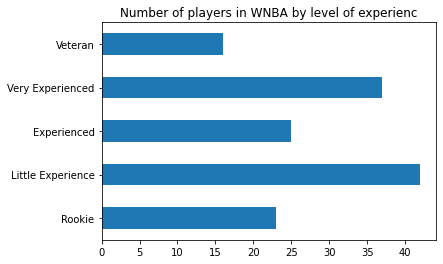

In [16]:
wnba["Exp_ordinal"].value_counts().iloc[[-2,0,2,1,-1]].plot.barh(title = "Number of players in WNBA by level of experienc")
plt.show()

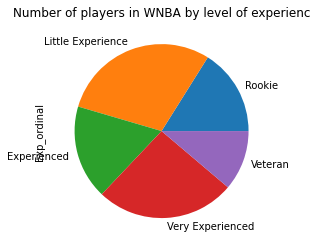

In [17]:
wnba["Exp_ordinal"].value_counts().iloc[[-2,0,2,1,-1]].plot.pie(title = "Number of players in WNBA by level of experienc")
plt.show()

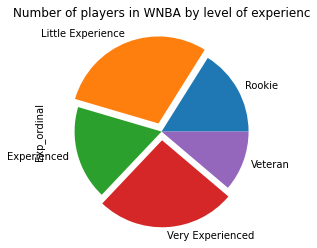

In [18]:
wnba["Exp_ordinal"].value_counts().iloc[[-2,0,2,1,-1]].plot.pie(explode = [0,0.1,0,0.1,0],  title = "Number of players in WNBA by level of experienc")
plt.show()

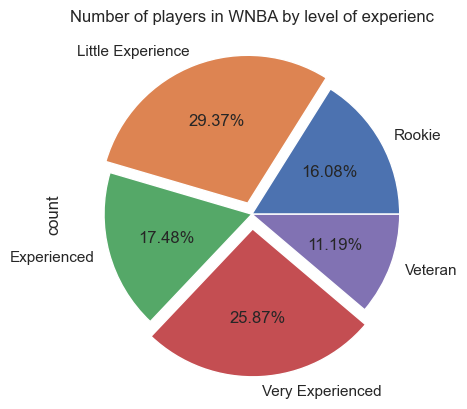

In [92]:
wnba["Exp_ordinal"].value_counts().iloc[[-2,0,2,1,-1]].plot.pie(explode = [0,0.08,0,0.1,0],autopct = "%.2f%%",  
                                                                
                                                                title = "Number of players in WNBA by level of experienc")
plt.show()

In [19]:
wnba["Exp_ordinal"].value_counts().iloc[[-2,0,2,1,-1]]*100

Rookie               2300
Little Experience    4200
Experienced          2500
Very Experienced     3700
Veteran              1600
Name: Exp_ordinal, dtype: int64

In [20]:
wnba["Exp_ordinal"].value_counts(normalize = True).iloc[[-2,0,2,1,-1]]*100 # normalized = True means convert into percentage

Rookie               16.083916
Little Experience    29.370629
Experienced          17.482517
Very Experienced     25.874126
Veteran              11.188811
Name: Exp_ordinal, dtype: float64

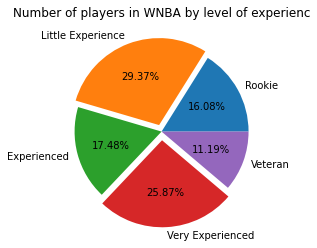

In [21]:
wnba["Exp_ordinal"].value_counts().iloc[[-2,0,2,1,-1]].plot.pie(explode = [0,0.08,0,0.1,0],autopct = "%.2f%%",  
                                                                
                                                                title = "Number of players in WNBA by level of experienc")
plt.ylabel("")
plt.show()

In [22]:
wnba.columns

Index(['Name', 'Team', 'Pos', 'Height', 'Weight', 'BMI', 'Birth_Place',
       'Birthdate', 'Age', 'College', 'Experience', 'Games Played', 'MIN',
       'FGM', 'FGA', 'FG%', '15:00', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'OREB',
       'DREB', 'REB', 'AST', 'STL', 'BLK', 'TO', 'PTS', 'DD2', 'TD3',
       'Exp_ordinal'],
      dtype='object')

In [24]:
wnba["Pos"]

0        F
1      G/F
2        G
3      G/F
4        G
      ... 
138      G
139      F
140      G
141    F/C
142      G
Name: Pos, Length: 143, dtype: object

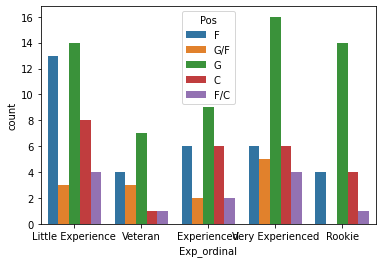

In [25]:
import seaborn as sns

sns.countplot(x = "Exp_ordinal", hue = "Pos", data = wnba )

plt.show()

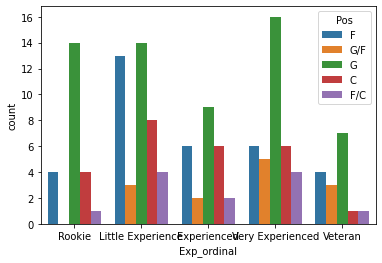

In [26]:
import seaborn as sns

sns.countplot(x = "Exp_ordinal", hue = "Pos", data = wnba, 
              order = ["Rookie", "Little Experience", "Experienced", "Very Experienced", "Veteran"] )

plt.show()

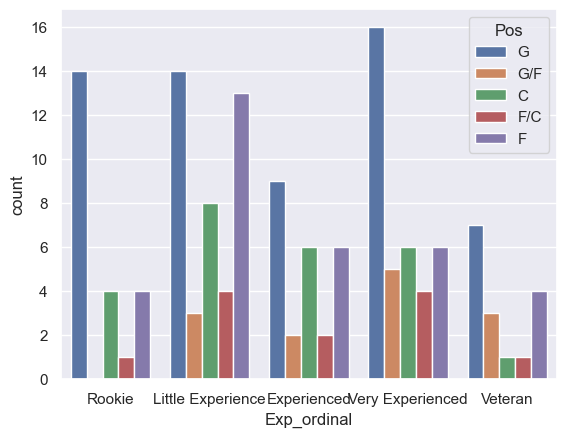

In [99]:
sns.countplot(x = "Exp_ordinal", hue = "Pos", data = wnba, 
              order = ["Rookie", "Little Experience", "Experienced", 
                       "Very Experienced", "Veteran"],
             hue_order = ["G", "G/F", "C", "F/C", "F", ])

plt.show()

In [27]:
wnba["Age"].mean()

27.076923076923077

In [28]:
wnba["MIN"].mean()

496.97202797202794

In [29]:
wnba["Age"].apply(lambda age:"old" if age>= 27 else "Young")

0      Young
1        old
2      Young
3        old
4      Young
       ...  
138      old
139      old
140      old
141      old
142      old
Name: Age, Length: 143, dtype: object

In [30]:
wnba["age_cat"] = wnba["Age"].apply(lambda age:"old" if age>= 27 else "Young")

wnba["min_cat"] = wnba["MIN"].apply(lambda Min:"avg or above" if Min>= 497 else "below average")

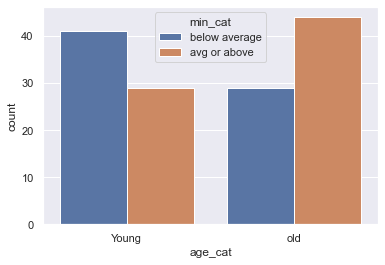

In [31]:
sns.set_theme()
sns.countplot(x = "age_cat", hue = "min_cat", data = wnba)
plt.show()

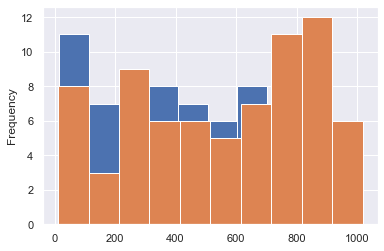

In [32]:
wnba.groupby("age_cat")["MIN"].plot.hist()
plt.show()

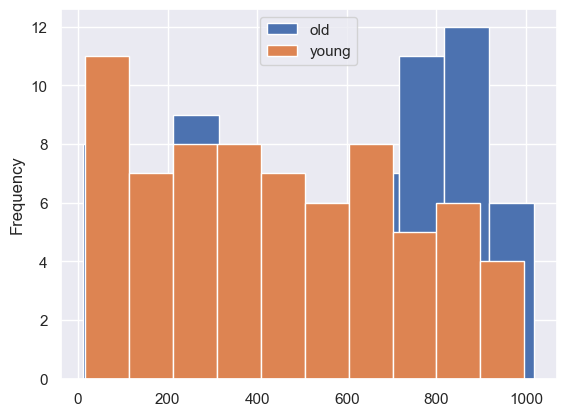

In [106]:
wnba[wnba["Age"]>= 27]["MIN"].plot.hist(label = "old")
wnba[wnba["Age"]< 27]["MIN"].plot.hist(label = "young")
plt.legend()
plt.show()

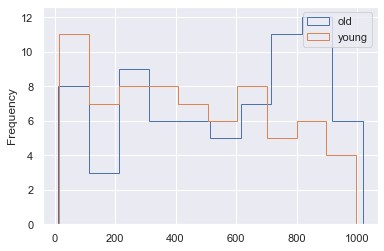

In [33]:
wnba[wnba["Age"]>= 27]["MIN"].plot.hist(label = "old", histtype = "step")
wnba[wnba["Age"]< 27]["MIN"].plot.hist(label = "young",  histtype = "step")
plt.legend()
plt.show()

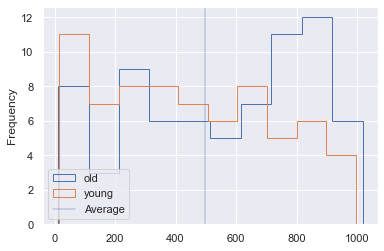

In [34]:
wnba[wnba["Age"]>= 27]["MIN"].plot.hist(label = "old", histtype = "step")
wnba[wnba["Age"]< 27]["MIN"].plot.hist(label = "young",  histtype = "step")
plt.axvline(497, label = "Average", alpha = 0.3)
plt.legend(loc = "lower left")
plt.show()

In [35]:
wnba["Age"].min()

21

In [36]:
wnba["Age"].max()

36

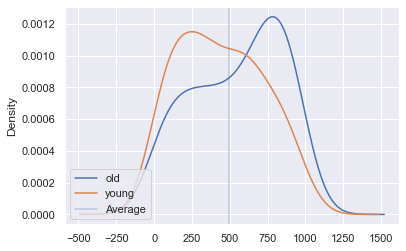

In [37]:
wnba[wnba["Age"]>= 27]["MIN"].plot.kde(label = "old")
wnba[wnba["Age"]< 27]["MIN"].plot.kde(label = "young")
plt.axvline(497, label = "Average", alpha = 0.3)
plt.legend(loc = "lower left")
plt.show()

In [38]:
wnba["Pos"]

0        F
1      G/F
2        G
3      G/F
4        G
      ... 
138      G
139      F
140      G
141    F/C
142      G
Name: Pos, Length: 143, dtype: object

In [39]:
positions = wnba["Pos"].unique()
positions

array(['F', 'G/F', 'G', 'C', 'F/C'], dtype=object)

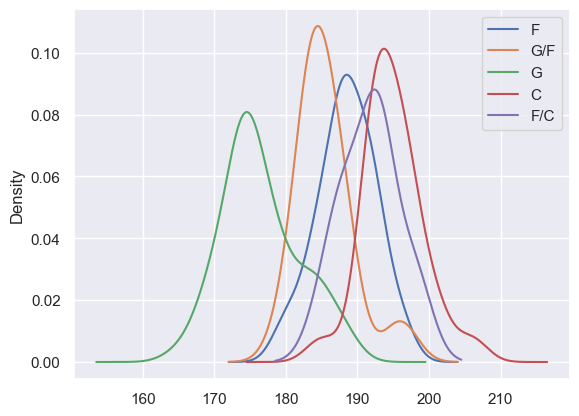

In [116]:
plt.subplot(1,1,1)

for pos in positions:
    bol_pos = wnba["Pos"] == pos
    wnba[bol_pos]["Height"].plot.kde(label = pos)
plt.legend()   
plt.show()

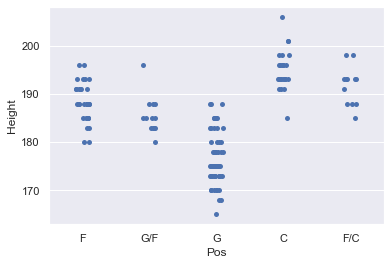

In [40]:
sns.stripplot(x = "Pos", y = "Height" , data = wnba)
plt.show()

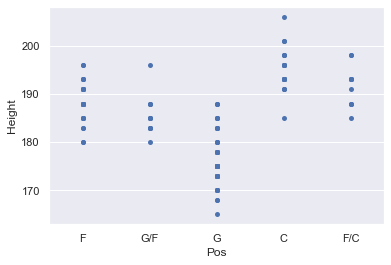

In [41]:
sns.stripplot(x = "Pos", y = "Height" , data = wnba, jitter = False)
plt.show()

In [42]:
wnba["Weight"].describe()

count    142.000000
mean      78.978873
std       10.996110
min       55.000000
25%       71.500000
50%       79.000000
75%       86.000000
max      113.000000
Name: Weight, dtype: float64

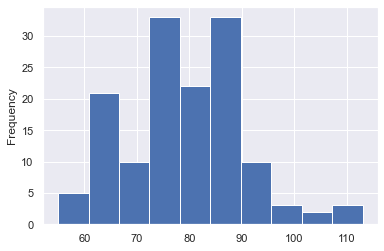

In [43]:
wnba["Weight"].plot.hist()
plt.show()

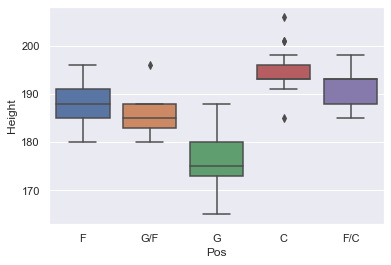

In [44]:
sns.boxplot(x = "Pos", y = "Height", data = wnba) # box and whisker
plt.show()

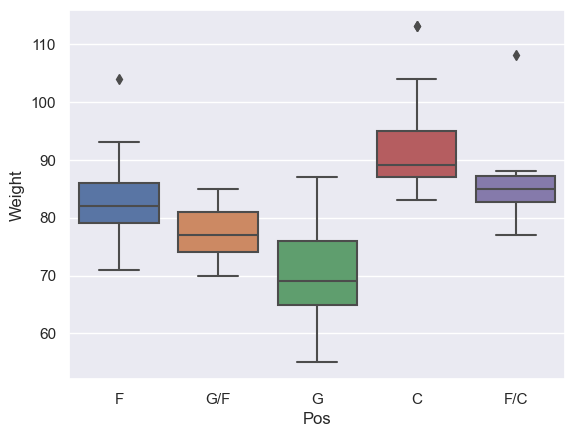

In [131]:
sns.boxplot(x = "Pos", y = "Weight", data = wnba, whis = 1.5)
plt.show()

In [49]:
wnba[wnba["Pos"] == "F"]["Weight"].describe()

count     33.000000
mean      83.090909
std        6.458346
min       71.000000
25%       79.000000
50%       82.000000
75%       86.000000
max      104.000000
Name: Weight, dtype: float64

In [129]:
iqr = 86-79

In [132]:
value = iqr*1.5

In [133]:
value

10.5

In [138]:
lower_bound = 79-(iqr*1.5)

lower_bound

68.5

In [140]:
upper_bound = 86+(iqr*1.5)

upper_bound

96.5

In [141]:
wnba[wnba["Pos"] == "C"]["Height"].describe()

count     25.000000
mean     194.920000
std        4.132392
min      185.000000
25%      193.000000
50%      193.000000
75%      196.000000
max      206.000000
Name: Height, dtype: float64

In [52]:
import numpy as np

In [61]:
q1 = np.percentile(wnba[wnba["Pos"] == "C"]["Height"],25)
q2 = np.percentile(wnba[wnba['Pos']=='C']["Height"],75)
q1

193.0

In [58]:
iqr= q2-q1
iqr

3.0

In [60]:
value = iqr*1.5
value

4.5

In [62]:
Lower_boundry = q1-value
Higher_boundry = q2+value

In [63]:
Lower_boundry

188.5

In [64]:
Higher_boundry

200.5

In [78]:
highset = set(wnba.Height)
highset

{165,
 168,
 170,
 173,
 175,
 178,
 180,
 183,
 185,
 188,
 191,
 193,
 196,
 198,
 201,
 206}

In [90]:
lst = []
for i in highset:
   
    if i < Lower_boundry or i > Higher_boundry:
        print(f" frequency {i} + lower {Lower_boundry} + or high {Higher_boundry}")
        lst.append(i)


 frequency 165 + lower 188.5 + or high 200.5
 frequency 168 + lower 188.5 + or high 200.5
 frequency 201 + lower 188.5 + or high 200.5
 frequency 170 + lower 188.5 + or high 200.5
 frequency 173 + lower 188.5 + or high 200.5
 frequency 206 + lower 188.5 + or high 200.5
 frequency 175 + lower 188.5 + or high 200.5
 frequency 178 + lower 188.5 + or high 200.5
 frequency 180 + lower 188.5 + or high 200.5
 frequency 183 + lower 188.5 + or high 200.5
 frequency 185 + lower 188.5 + or high 200.5
 frequency 188 + lower 188.5 + or high 200.5


In [91]:
print(lst)

[165, 168, 201, 170, 173, 206, 175, 178, 180, 183, 185, 188]
